# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load CSV File
Use pandas to load the CSV file into a DataFrame.

Note: The max ADC value from the as7341 sensor is: 65535

In [25]:
# Load CSV File
df = pd.read_csv('../kdupro/2025-02-26_disco_bay/2025-02-26_buoy0_usa_discobay_0.5_revised.csv')

display(HTML("<h1>HEAD</h1>"))
# Display the first few rows of the DataFrame
# print(df.head())

# Display the first few rows of the DataFrame without wrapping columns
display(HTML(df.head().to_html()))

display(HTML("<h1>Describe</h1>"))
# Display summary statistics of the DataFrame

display(HTML(df.describe().to_html()))

display(HTML("<h1>Data Types</h1>"))
# Display data types of the DataFrame
print(df.dtypes)

,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
0,2025-02-26T10:14:03:049Z,20894,29261,36117,40226,41251,44231,47725,50601,50601,50601
1,2025-02-26T10:14:04:050Z,20931,29626,36178,40610,40338,43759,46937,50601,50601,50601
2,2025-02-26T10:14:05:050Z,20331,28646,34824,39165,39718,43296,46846,50601,50601,50601
3,2025-02-26T10:14:06:050Z,20486,28775,35061,39433,40618,44288,47842,50601,50601,50601
4,2025-02-26T10:14:07:050Z,17874,24750,31099,36029,36919,40961,46695,50601,50601,50601


,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,34813.922828,39989.604436,44556.542976,46095.751848,46491.771719,46267.193623,45017.825786,43709.672366,49643.923290,39132.717652
std,17473.041069,15236.192279,12640.301777,11765.348822,11631.138263,11723.804388,12738.867052,14002.874626,5348.795512,19077.628108
min,348.000000,390.000000,435.000000,509.000000,475.000000,572.000000,638.000000,748.000000,6919.000000,1100.000000
25%,17775.750000,29084.500000,45689.500000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,16603.000000
50%,43571.500000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000
75%,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000
max,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000


TIME        object
F1-415nm     int64
F2-445nm     int64
F3-480nm     int64
F4-515nm     int64
F5-555nm     int64
F6-590nm     int64
F7-630nm     int64
F8-680nm     int64
Clear        int64
Near-IR      int64
dtype: object


# Handle Missing Values
Check for missing values and handle them appropriately (e.g., fill, drop).

In [29]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# # Handle missing values by filling with the mean of each column
# df_filled = df.fillna(df.mean())

# # Verify that there are no more missing values
# missing_values_after_filling = df_filled.isnull().sum()
# print("Missing values after filling:\n", missing_values_after_filling)

# # Display the first few rows of the DataFrame after handling missing values
# df_filled.head()

Missing values in each column:
 TIME        0
F1-415nm    0
F2-445nm    0
F3-480nm    0
F4-515nm    0
F5-555nm    0
F6-590nm    0
F7-630nm    0
F8-680nm    0
Clear       0
Near-IR     0
dtype: int64


# Data Visualization
Use matplotlib to visualize the data (e.g., line plots, histograms).

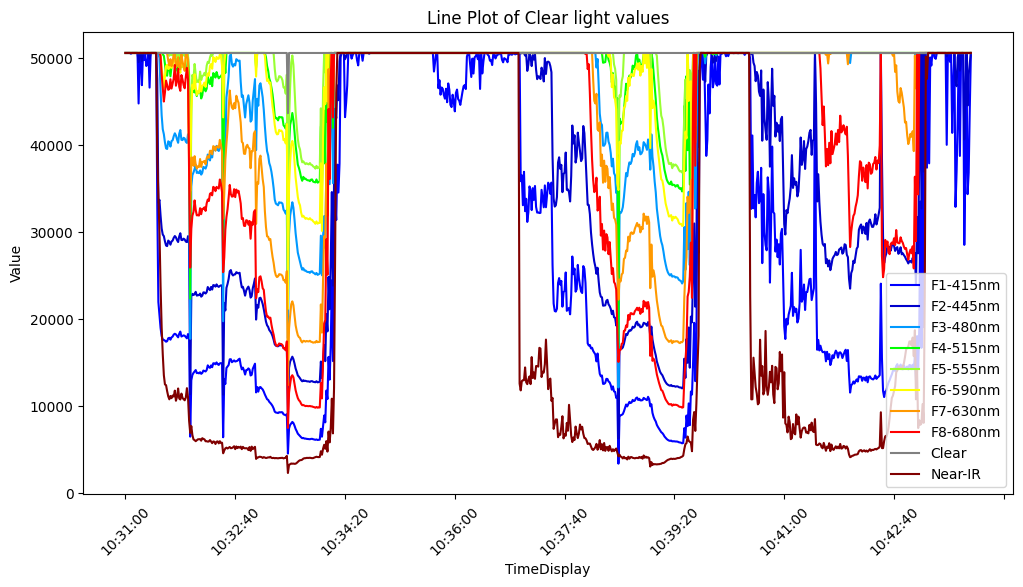

In [ ]:
# Data Visualization

# Dictionary of the df column names as keys and the pandas rgb value associated with the mentioned wavelength of light:
color_dict = {
    'F1-415nm': '#0000FF',  # Blue
    'F2-445nm': '#0000CC',  # Dark Blue
    'F3-480nm': '#0099FF',  # Light Blue
    'F4-515nm': '#00FF00',  # Green
    'F5-555nm': '#99FF33',  # Light Green
    'F6-590nm': '#FFFF00',  # Yellow
    'F7-630nm': '#FF9900',  # Orange
    'F8-680nm': '#FF0000',  # Red
    'Clear': '#808080',     # Gray
    'Near-IR': '#800000'    # Maroon
}

# Convert the TIME column to a standard timestamp format
df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')

# Convert the TIME column to datetime format and create a new column with a more readable format
df['TimeDisplay'] = pd.to_datetime(df['TimeStandard']).dt.strftime('%H:%M:%S')

# Trim the rows to TimeDisplay values between 10:30:00 and 10:45:00
df = df[(df['TimeDisplay'] >= '10:31:00') & (df['TimeDisplay'] <= '10:43:50')]


# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# colNamesToPlot = ["Clear", "F7-630nm", "F8-680nm"]
# colNamesToPlot = ["Clear"]
colNamesToPlot = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm", "Clear", "Near-IR"]

for colName in colNamesToPlot:
    plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Line Plot of Clear light values')
plt.legend()
plt.xticks(rotation=45)
plt.show()